In [1]:
import os
import sys
import pandas as pd
#import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
# Build an absolute path from this notebook's parent directory
module_path = os.path.abspath(os.path.join('..', 'src'))
print(module_path)
# Add to sys.path if not already present
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)
# Now you can import the desired function or class
#from clean_df import *
from graph_helpers import *
from helpers import *
from mod_si import *
from plots import *
from find_net_stats import *

/nfs/nfs9/home/nobackup/vakrao/nz_model/src
/nfs/nfs9/home/nobackup/vakrao/nz_model/src


# We graph the best-fitting values for the raw-data only

In [2]:
year_raw = "../results/results_best_y.csv"
seas_raw = "../results/results_best_s.csv"
month_raw = "../results/results_best_m.csv"
real_inc_fp,window_inc_fp  = "../params/raw_data.csv","../params/ma_data.csv"
all_y = pd.read_csv(year_raw)
all_s = pd.read_csv(seas_raw)
all_m = pd.read_csv(month_raw)
real_inc = pd.read_csv(real_inc_fp)["Delta Orchard"]
ma_inc = pd.read_csv(window_inc_fp)["Delta Orchard"]

## Raw Data 

In [3]:
eps,pct = 30,0.8
y_raw_viable = find_viable(all_y,real_inc,eps,pct)
s_raw_viable = find_viable(all_s,real_inc,eps,pct)
m_raw_viable = find_viable(all_m,real_inc,eps,pct)

In [4]:
y_raw_best = find_best(y_raw_viable)
s_raw_best = find_best(s_raw_viable)
m_raw_best = find_best(m_raw_viable)

## MA Data 

In [5]:
eps,pct = 30,0.8
year_raw = "../results/results_best_y_ma.csv"
seas_raw = "../results/results_best_s_ma.csv"
month_raw = "../results/results_best_m_ma.csv"
all_y = pd.read_csv(year_raw)
all_s = pd.read_csv(seas_raw)
all_m = pd.read_csv(month_raw)
y_ma_viable = find_viable(all_y,ma_inc,eps,pct)
s_ma_viable = find_viable(all_s,ma_inc,eps,pct)
m_ma_viable = find_viable(all_m,ma_inc,eps,pct)

In [6]:
y_ma_best = find_best(y_ma_viable)
s_ma_best = find_best(s_ma_viable)
m_ma_best = find_best(m_ma_viable)

## Graph

/tmp/ipykernel_3513710/3571720768.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(months)
/tmp/ipykernel_3513710/3571720768.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(months)


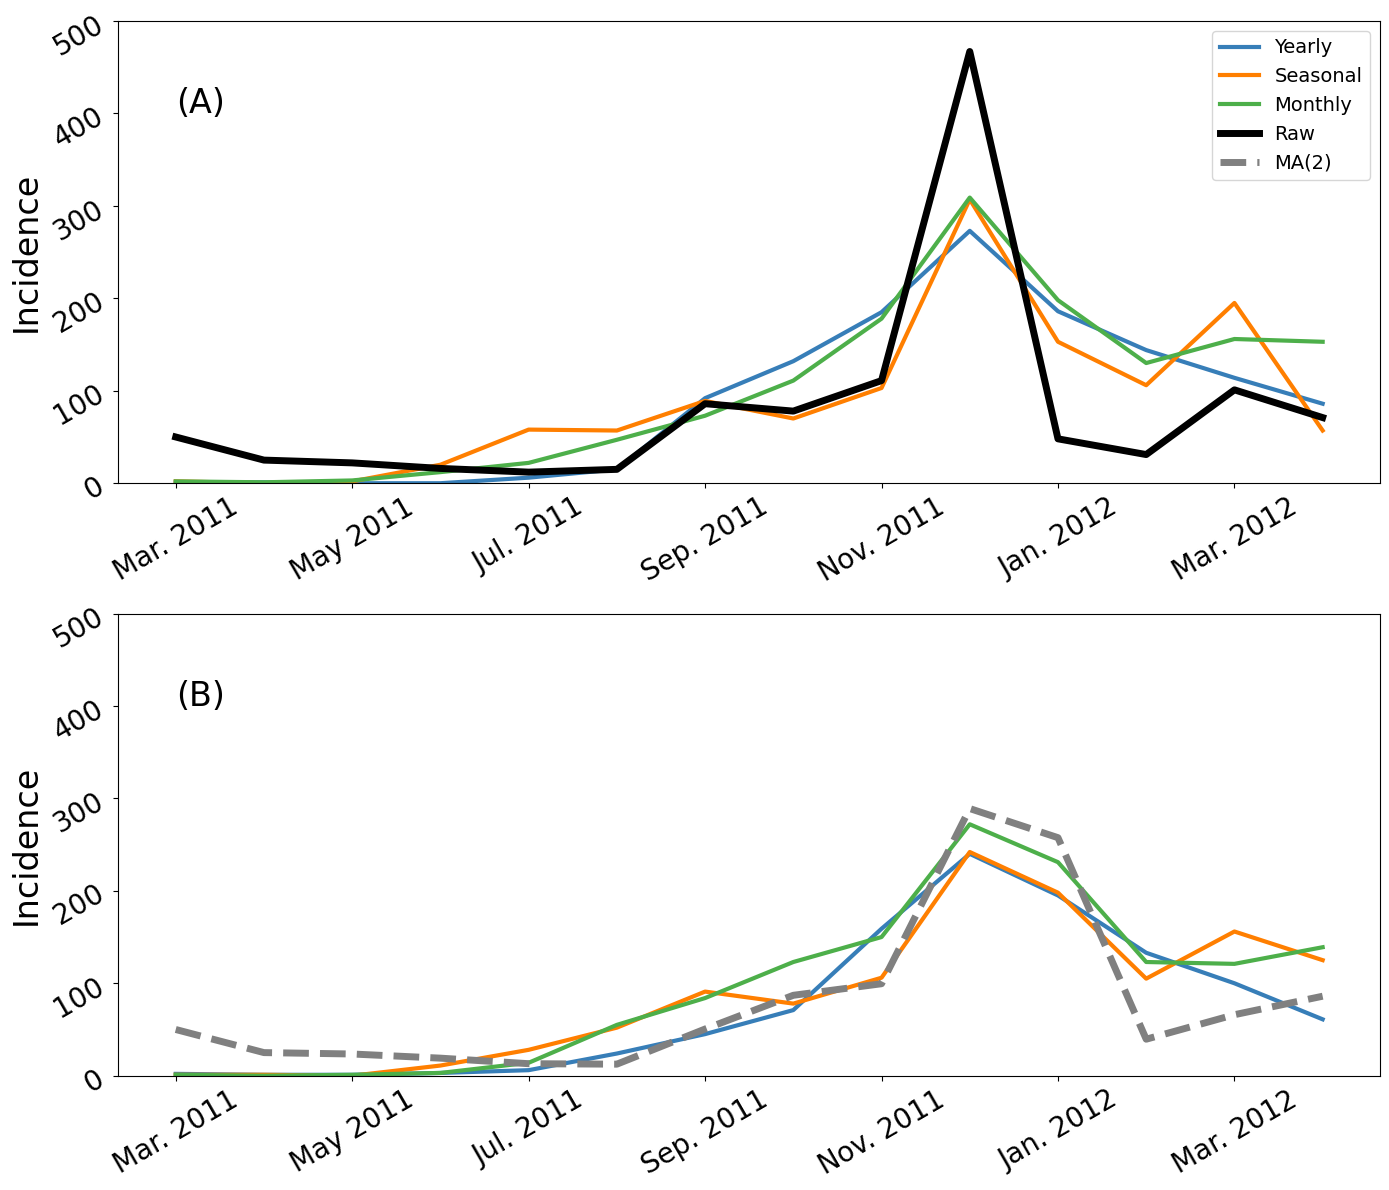

In [7]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
colors = ["#377eb8","#ff7f00","#4daf4a"]
#bar_colors = {config_names[0]:"#af8dc3",config_names[1]:"#e7298a"}
temp_types = ["Yearly","Seasonal","Monthly"]
#months_all = ["MAR/11","APR/11","MAY/11","JUN/11","JUL/11","AUG/11","SEP/11","OCT/11","NOV/11","DEC/11","JAN/12","FEB/12","MAR/12"]
months = ["","Mar. 2011","May 2011","Jul. 2011","Sep. 2011","Nov. 2011","Jan. 2012","Mar. 2012"]

fig_x,fig_y = 14,12
fig,axs = plt.subplots(2,1,figsize=(fig_x,fig_y),sharey=True)
ms,ls = 12,20
annot_fs = 24
sup_font = 24
raw_lab = "Raw"
ma_lab = "MA(2)"


lw,inc_lw = 3,5
leg_fs = 14
tick_angle = 30
ins_sz = 16
mark_type = "o"
lab_coords = (0,400)
offset,width = 2,0.2
# now start to graph
axs[0].annotate("(A)",lab_coords,size=annot_fs,annotation_clip=False)
axs[0].tick_params(labelsize=ls,rotation=tick_angle)

axs[0].plot(y_raw_best["inc"],color=colors[0],markersize=ms,linewidth=lw,label="Yearly")
axs[0].plot(s_raw_best["inc"],color=colors[1],markersize=ms,linewidth=lw,label="Seasonal")
axs[0].plot(m_raw_best["inc"],color=colors[2],markersize=ms,linewidth=lw,label="Monthly")
axs[0].set_xticklabels(months)

axs[0].plot(real_inc,color="k",linewidth=inc_lw,label=raw_lab,markersize=ms)
fig.tight_layout()

#ins_ax0.legend(bbox_to_anchor=(.6, 1.4))
ins_y_fs = 20


axs[1].tick_params(labelsize=ls,rotation=tick_angle)
axs[1].annotate("(B)",lab_coords,size=annot_fs,annotation_clip=False)

axs[1].plot(y_ma_best["inc"],color=colors[0],markersize=ms,linewidth=lw)
axs[1].plot(s_ma_best["inc"],color=colors[1],markersize=ms,linewidth=lw)
axs[1].plot(m_ma_best["inc"],color=colors[2],markersize=ms,linewidth=lw)

axs[1].plot(ma_inc,color="grey",ls="--",linewidth=inc_lw,label=ma_lab,markersize=ms)


axs[1].set_xticklabels(months)

# Get handles and labels from both axes
handles_main, labels_main = axs[0].get_legend_handles_labels()
handles_ax1, labels_ax1 = axs[1].get_legend_handles_labels()

# 3. Combine them
all_handles = handles_main + handles_ax1
all_labels = labels_main + labels_ax1

# 4. Create the combined legend on the main axes
axs[0].legend(all_handles, all_labels,fontsize=leg_fs,loc="upper right")
#axs[0].legend(fontsize=14,)
axs[0].set_ylim([0,500])
axs[1].set_ylim([0,500])

axs[0].set_ylabel("Incidence",fontsize=sup_font)
axs[1].set_ylabel("Incidence",fontsize=sup_font)
#fig.supxlabel("Time",fontsize=sup_font)
fig.tight_layout()
fig.savefig("figs/best-fit.png")